# NYC Weather Data Analysis
___

## 1. Data Description & Purpose
---

These data files are from NOAA online weather, representing data retrieved from a weather station located in Central Park, NY.  It contains daily weather temperatures (max, min, average) as well as precipitation, snowfall, and snow depth readings.

[NOAA Online Weather](http://w2.weather.gov/climate/xmacis.php?wfo=okx)

The purpose of this analysis is to identify pleasant weather days over the months of August to September.  We will be doing so by identifying days that have been historically pleasant over the course of 2014, 2015, 2016.  

For the purpose of this analysis, we have define a pleasant day as
* A day having an average temperature above 60F, and
* A day having no precipitation



## 2. Data Import

The data has been scrapped from the above website and placed into a csv file named 'nyc_temperature.csv'.  We can read this data into a dataframe to begin working with the data

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import the weather data into a dataframe
nyc_temp = pd.read_csv('./data/nyc_weather.csv', parse_dates=['date'], index_col=0)

## 3. Data Exploration

Let's look at the descriptive data statisics to explore the data set

In [127]:
nyc_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276 entries, 2014-08-01 to 2016-10-31
Data columns (total 6 columns):
temp_max         276 non-null int64
temp_min         276 non-null int64
temp_avg         276 non-null float64
precipitation    276 non-null object
new_snow         276 non-null int64
snow_depth       276 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 15.1+ KB


In [6]:
nyc_temp.describe()

temp_max    temp_min    temp_avg  new_snow  snow_depth
count  276.000000  276.000000  276.000000     276.0       276.0
mean    76.851449   62.000000   69.425725       0.0         0.0
std     10.660873    9.623456    9.949642       0.0         0.0
min     50.000000   35.000000   44.000000       0.0         0.0
25%     69.000000   55.000000   62.500000       0.0         0.0
50%     79.000000   63.500000   71.500000       0.0         0.0
75%     86.000000   69.250000   77.500000       0.0         0.0
max     97.000000   81.000000   88.500000       0.0         0.0

In [7]:
nyc_temp.head()

temp_max  temp_min  temp_avg precipitation  new_snow  snow_depth
date                                                                        
2014-08-01        84        71      77.5             0         0           0
2014-08-02        74        63      68.5          0.41         0           0
2014-08-03        76        66      71.0          0.07         0           0
2014-08-04        84        70      77.0             0         0           0
2014-08-05        90        71      80.5             0         0           0

## 4. Exploring Average Temperature

We want to be able to group temperatures by the day of the month, so we will create a new fields for this using the code below

In [10]:
# create a month_day column that can be used for plotting
nyc_temp['month_day'] = [d.strftime('%b %d') for d in nyc_temp.index]
nyc_temp.head()

temp_max  temp_min  temp_avg precipitation  new_snow  snow_depth  \
date                                                                           
2014-08-01        84        71      77.5             0         0           0   
2014-08-02        74        63      68.5          0.41         0           0   
2014-08-03        76        66      71.0          0.07         0           0   
2014-08-04        84        70      77.0             0         0           0   
2014-08-05        90        71      80.5             0         0           0   

           month_day  
date                  
2014-08-01    Aug 01  
2014-08-02    Aug 02  
2014-08-03    Aug 03  
2014-08-04    Aug 04  
2014-08-05    Aug 05

Great, now with the month day column, we are able to graph the average temperature

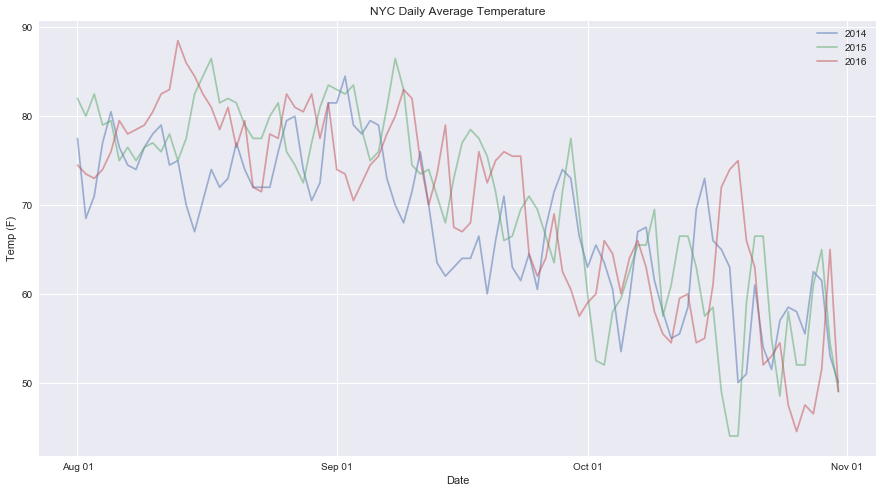

In [16]:
from datetime import datetime
from matplotlib import dates

# create the figure
fig, ax = plt.subplots(figsize=(15,8)) 

# loop through the years
for year in ['2014', '2015', '2016']:

    # get the data for the current year
    df = nyc_temp[year]

    # create our x values (we need to map the date value to a number format)
    x = dates.date2num([datetime.strptime(d, '%b %d') for d in df['month_day']])
    
    # our y values will just be the average temperature
    y = df['temp_avg']

    # plot the data
    plt.plot(x, y, alpha=0.5, label = year)

# we want to format the x axis to show the month and day
xaxis_label_formatter = dates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(xaxis_label_formatter)
ax.xaxis.set_major_locator(dates.MonthLocator())  
    
# setup our labels
plt.title('NYC Daily Average Temperature')
plt.ylabel('Temp (F)')
plt.xlabel('Date')

# setup legend
plt.legend(loc='best')
fig.savefig('./figures/nyc_daily_avg_temp')
plt.show()

We've defined that a pleasant day must be above 60F - Having a look at the above graph, we can see that as we approach October, the likelihood that our days begin to dip below this mark increases.  

The closer we get to November, the less likely we will experience days with an average temperature of 60F.

## 5. Exploring Precipitation

Within this particular dataset, we have a column that identifies precipitation amount.  On days which trace amounts of precipitation are observed, the dataset has indicated a 'T' value rather than an actual number.  In order to present this data, we need to normalize the data. 

First, let's take a look at what our precipitation levels look like

In [28]:
def convert_precip(p):
    """
        Validates a percipitation amount to verify if percipitation was observed
        for a given day.
        
        Returns the amount of precipitation observed.  In cases where trace amounts
        were recorded, we will return 0
    """
    try: 
        return float(p)

    except:
            return 0
  

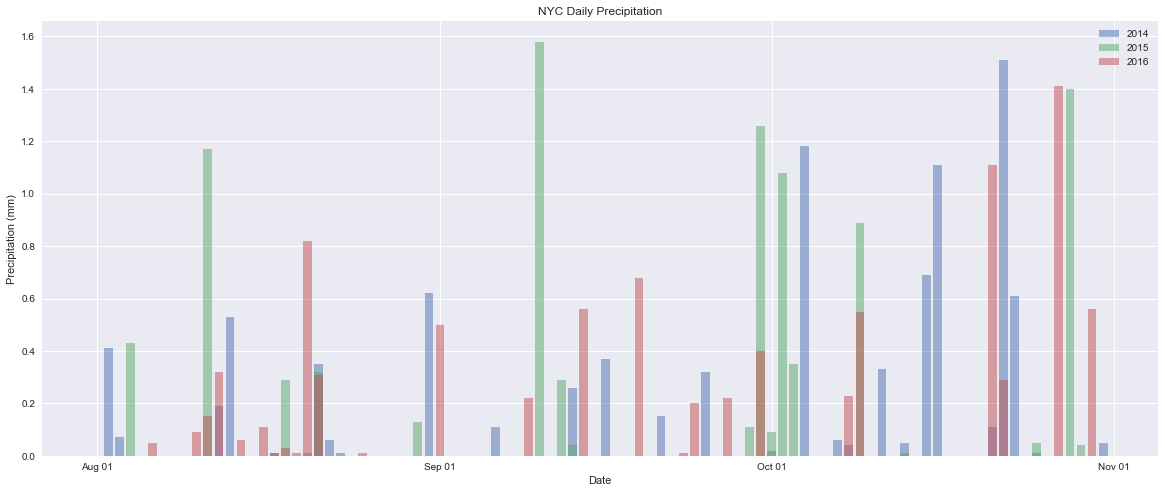

In [45]:
from datetime import datetime
from matplotlib import dates

# create the figure
fig, ax = plt.subplots(figsize=(20,8)) 

# loop through the years
for year in ['2014', '2015', '2016']:

    # get the data for the current year
    df = nyc_temp[year]

    # create our x values (we need to map the date value to a number format)
    x = dates.date2num([datetime.strptime(d, '%b %d') for d in df['month_day']])
    
    # our y values will just be the precipitation
    y = df['precipitation'].values
    
    # for the purpose of our graph, we are going to set the precipitation values for 'T'
    # to be 0
    y = [convert_precip(p) for p in y]

    # plot the data
    plt.bar(x, y, alpha=0.5, label = year)

# we want to format the x axis to show the month and day
xaxis_label_formatter = dates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(xaxis_label_formatter)
ax.xaxis.set_major_locator(dates.MonthLocator())  
    
# setup our labels
plt.title('NYC Daily Precipitation')
plt.ylabel('Precipitation (mm)')
plt.xlabel('Date')

# setup legend
plt.legend(loc='best')
fig.savefig('./figures/nyc_daily_precipitation')
plt.show()

Based on the graph, we see that there are only a few days historically that do not experience rain.  Let's create a new classification column that determines whether a day contained rain.

In [46]:
def precip_check(p):
    """
        Validates a percipitation amount to verify if percipitation was observed
        for a given day.
        
        Returns True for any value greater than 0.  In cases of trace amounts, we will
        return false
    """
    try: 
        if float(p) > 0: 
            return True
        else:
            return False
    except:
            return False
  

In [48]:
# create a new column named 'has_precip', which will be a boolean value to identify 
# whether precipitation was observed on the given day
nyc_temp['has_precip'] = nyc_temp.precipitation.apply(precip_check)

In [50]:
nyc_temp.head()

temp_max  temp_min  temp_avg precipitation  new_snow  snow_depth  \
date                                                                           
2014-08-01        84        71      77.5             0         0           0   
2014-08-02        74        63      68.5          0.41         0           0   
2014-08-03        76        66      71.0          0.07         0           0   
2014-08-04        84        70      77.0             0         0           0   
2014-08-05        90        71      80.5             0         0           0   

           month_day has_precip  
date                             
2014-08-01    Aug 01      False  
2014-08-02    Aug 02       True  
2014-08-03    Aug 03       True  
2014-08-04    Aug 04      False  
2014-08-05    Aug 05      False

In [71]:
# How many days in each year 
for year in ['2014', '2015', '2016']:
    nyc_p = nyc_temp[year]
    print('{}: {}'.format(year, nyc_p[nyc_p.has_precip == True].has_precip.count()/len(nyc_temp)))


2014: 0.09782608695652174
2015: 0.06884057971014493
2016: 0.09420289855072464


We see that there is less than 10% of days that experience rain in a given year.  

## 6. Exploring Pleasant Days
___

How many days do we actually have each year where the weather is pleasant? We define a pleasant day as
* avg temp >= 60F
* no precipitation

In [73]:
# filter days to only have pleasant weather
temp_mask = nyc_temp['temp_avg'] >= 60
precip_mask = nyc_temp['has_precip'] == False

pleasant_days = nyc_temp[temp_mask & precip_mask]

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


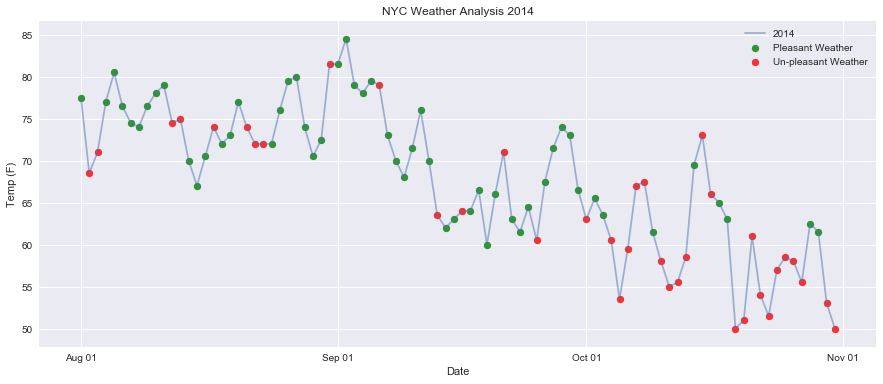

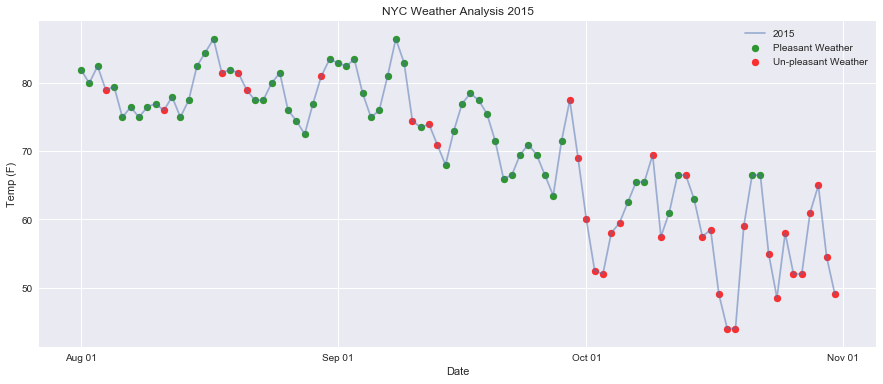

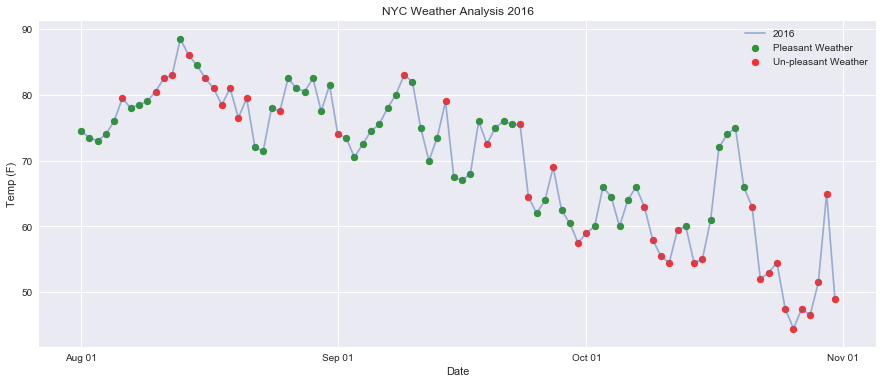

In [77]:
# Let's plot the results

# Loop through our years 
for year in ['2014', '2015', '2016']:

    # setup the plot
    fig, ax = plt.subplots(figsize=(15,6)) 

    # setup our xaxis labels
    date_formatter = dates.DateFormatter('%b %d')
    ax.xaxis.set_major_formatter(date_formatter)
    ax.xaxis.set_major_locator(dates.MonthLocator())

    # find the plot for the year
    x = dates.date2num([datetime.strptime(d, '%b %d') for d in nyc_temp[year].month_day])
    y = temp[year].temp_avg

    # create the plot
    plt.plot(x, y, alpha=0.5, label = year)

    # find the plot for pleasant weather
    df_year = nyc_temp[year]
    pleasant_days = df_year[temp_mask & precip_mask]
    unpleasant_days = df_year[~temp_mask | ~precip_mask]
    
    # find pleasant days
    x_p = dates.date2num([datetime.strptime(d, '%b %d') for d in pleasant_days['month_day']])
    y_p = pleasant_days['temp_avg']

    # find the unpleasant days
    x_up = dates.date2num([datetime.strptime(d, '%b %d') for d in unpleasant_days['month_day']])
    y_up = unpleasant_days['temp_avg']

    # create the plot
    plt.scatter(x_p, y_p, label = 'Pleasant Weather', color='g', alpha=0.8)
    plt.scatter(x_up, y_up, label = 'Un-pleasant Weather', color='r', alpha=0.8)
   
    # set the labels
    plt.ylabel('Temp (F)')
    plt.xlabel('Date')
    plt.title('NYC Weather Analysis ' + year)

    plt.legend(loc='best')
    fig.savefig('./figures/nyc_weather_'+ year)
    
    plt.show()





We have identified what days are pleasant in our analysis window.  How can we get an idea of what days are historically pleasant (meaning, over the years, has the same day been consistently plesant)? 

In [80]:
# Get a list of pleasant days
pleasant_days = nyc_temp[temp_mask & precip_mask]

# create a set 
days2014 = set(list(pleasant_days['2014'].month_day))
days2015 = set(list(pleasant_days['2015'].month_day))
days2016 = set(list(pleasant_days['2016'].month_day))

common_days = set.intersection(days2014, days2015, days2016)

print(sorted(common_days))

['Aug 01', 'Aug 05', 'Aug 07', 'Aug 08', 'Aug 09', 'Aug 15', 'Aug 24', 'Aug 26', 'Aug 27', 'Aug 28', 'Aug 29', 'Sep 02', 'Sep 03', 'Sep 04', 'Sep 05', 'Sep 07', 'Sep 08', 'Sep 11', 'Sep 15', 'Sep 17', 'Sep 18', 'Sep 20', 'Sep 22', 'Sep 26', 'Sep 28']


In [89]:
# find the avgerage temperature on these days that are historically pleasant
nyc_temp_avg = {}

for day in sorted(common_days):
    nyc_temp_avg[day] = nyc_temp[nyc_temp.month_day == day].temp_avg.sum()/3.0

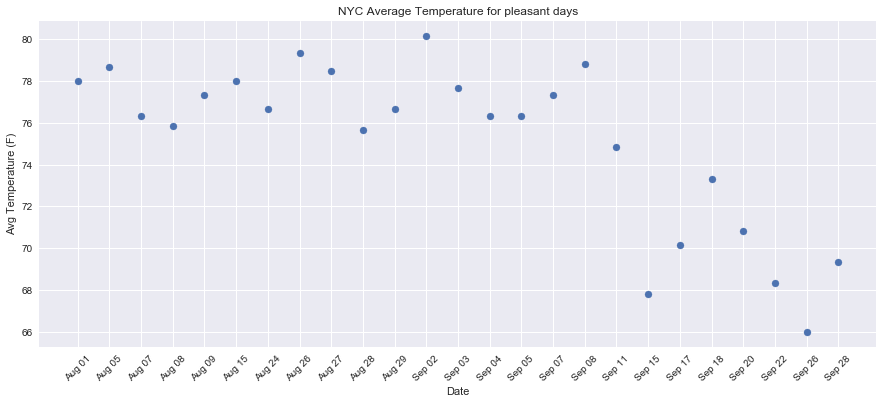

In [106]:
# Let's graph these temperatures

# get our x and y
x = np.arange(len(nyc_temp_avg.keys()))
y = list(nyc_temp_avg.values())

# plot temperatures
fig, ax = plt.subplots(figsize=(15,6)) 
plt.scatter(x, y)
plt.xticks(x, nyc_temp_avg.keys(), rotation=45)

# set labels
plt.ylabel('Avg Temperature (F)')
plt.xlabel('Date')
plt.title('NYC Average Temperature for pleasant days')

fig.savefig('./figures/nyc_average_temp_pleasant_days')

plt.show()



We see from the graph that the majority of pleasant days occur in August and the first week of September.  

## 7. Data Export

With the initial analysis complete, we can export our nyc_temp dataframe so that we can easily import a cleaned dataframe at any point in the future

In [108]:
# export to file
nyc_temp.to_csv('./data/nyc_weather_cleaned.csv')

## 8. Conclusions

We have observed that there are 25 potential pleasant days over the August to October time frame:

In [124]:
pleasant_days = pd.Series(nyc_temp_avg)
pleasant_days

Aug 01    78.000000
Aug 05    78.666667
Aug 07    76.333333
Aug 08    75.833333
Aug 09    77.333333
Aug 15    78.000000
Aug 24    76.666667
Aug 26    79.333333
Aug 27    78.500000
Aug 28    75.666667
Aug 29    76.666667
Sep 02    80.166667
Sep 03    77.666667
Sep 04    76.333333
Sep 05    76.333333
Sep 07    77.333333
Sep 08    78.833333
Sep 11    74.833333
Sep 15    67.833333
Sep 17    70.166667
Sep 18    73.333333
Sep 20    70.833333
Sep 22    68.333333
Sep 26    66.000000
Sep 28    69.333333
dtype: float64

In [122]:
pleasant_days.to_csv('./data/nyc_weather_pleasant_days.csv')